In [177]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
#from scipy.stats import norm 
#import pandas_profiling

In [2]:
SA_CrimeStats = pd.read_csv('SouthAfricaCrimeStats_v2.csv')
SA_ProPop = pd.read_csv('ProvincePopulation.csv')

# Question 1

    • Join Population data with crime statistics table.
    • Group by: Province and sum crimes over each year.
    • What is the most dangerous province overall?
    • Rank average crimes per year for all crime types.

## Population Data and Crime Statistics joined as SA_CrimePop

In [6]:
display(SA_CrimeStats.columns,SA_ProPop.columns)

Index(['Province', 'Station', 'Category', '2005-2006', '2006-2007',
       '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016'],
      dtype='object')

Index(['Province', 'Population', 'Area', 'Density'], dtype='object')

In [3]:
SA_CrimePop = pd.merge(SA_CrimeStats,SA_ProPop)
SA_CrimePop

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Population,Area,Density
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,5822734,129462,45.0
1,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,5822734,129462,45.0
2,Western Cape,Cape Town Central,Theft out of or from motor vehicle,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509,5822734,129462,45.0
3,Western Cape,Mitchells Plain,Drug-related crime,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609,5822734,129462,45.0
4,Western Cape,Bellville,All theft not mentioned elsewhere,3010,2828,2721,2911,2691,2180,2435,2231,2249,2136,1839,5822734,129462,45.0
5,Western Cape,Mitchells Plain,Common assault,2657,2339,2131,2735,2749,2444,2810,2757,2185,1847,2079,5822734,129462,45.0
6,Western Cape,Milnerton,All theft not mentioned elsewhere,2239,2260,2270,2329,2099,1872,1875,2127,1974,1948,2144,5822734,129462,45.0
7,Western Cape,Claremont,All theft not mentioned elsewhere,2111,1894,1684,1728,1549,1426,1556,1520,1548,1690,1561,5822734,129462,45.0
8,Western Cape,Parow,All theft not mentioned elsewhere,2107,2147,2022,1913,1840,1544,1795,1692,1946,1892,1693,5822734,129462,45.0
9,Western Cape,Ravensmead,All theft not mentioned elsewhere,2085,1940,2549,1790,1707,1788,1681,1535,1483,1454,1507,5822734,129462,45.0


## Grouping by Province as SA_CrimePop_GrP
    The groupings of the crimes is been made according to Province as SA_CrimePop_GrP.
    Next, the grouped data according to Province is been summed over each year as Sum_Crimes,
    dropping the non-required fileds ; ['Area','Population','Density']
    

In [4]:
SA_CrimePop_GrP = SA_CrimePop.groupby('Province')
Sum_Crimes =SA_CrimePop_GrP.sum().drop(['Area','Population','Density'], axis=1)

In [9]:
Sum_Crimes

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,
Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


## Finding the most dangerous Province overall 
    To find the most dangerous Province overall means to sum the crimes for all the years for each Province and find the maximum

In [5]:
Overall_Sum_Crimes = Sum_Crimes.sum(axis=1)
Overall_Sum_Crimes

Province
Eastern Cape     2370079
Free State       1397044
Gauteng          6855654
Kwazulu/Natal    3808898
Limpopo          1201185
Mpumalanga       1370933
North West       1255258
Northern Cape     546262
Western Cape     4792127
dtype: int64

In [6]:
Most_Dagerous_Province = Overall_Sum_Crimes.idxmax()
Total_MDP =  Overall_Sum_Crimes.max() # Total_MDP is the maximum sum of crimes for all the years of the most dangerous Province
Most_Dagerous_Province,Total_MDP

('Gauteng', 6855654)

### The most dagerous Province according to the data is Gauteng


## Ranking average crimes per year for all crime types
    To rank the average crimes per year for all crime types, I;
    1. grouped the crime according to their types, recording the number of crimes for 
        each of the categories in each year
    2. found the average number of crime occurance over all the tpyes of crimes for each year
    3. ranked the average crimes per year over all crimes


In [7]:
Crime_types = SA_CrimeStats.groupby('Category').sum()
Avg_Crime_Alltypes = SA_CrimeStats.mean(axis=0)
Avg_Crime_Alltypes

2005-2006    70.527753
2006-2007    69.301610
2007-2008    67.154305
2008-2009    68.756165
2009-2010    69.517773
2010-2011    67.766696
2011-2012    68.259616
2012-2013    69.700658
2013-2014    71.416999
2014-2015    71.498202
2015-2016    70.736496
dtype: float64

In [8]:
Ranking = pd.Series(Avg_Crime_Alltypes.rank())
Ranking

2005-2006     8.0
2006-2007     5.0
2007-2008     1.0
2008-2009     4.0
2009-2010     6.0
2010-2011     2.0
2011-2012     3.0
2012-2013     7.0
2013-2014    10.0
2014-2015    11.0
2015-2016     9.0
dtype: float64







# Question 2

    • Contrast volume vs density of crimes.
    • Compare population density and crime rate - do places with higher population density tend to have higher crime     rates (correlation)?


# Question 3
    • Group by: Crime Type.
    • In which provinces does drug-related crime occur more than 1000 times a year (on average).
    • Which Province has the highest number of stations? What is the average crime rate per station in this province?


### Grouping by Crime
    This is done by grouping according to the Category of crimes since that is the crime types.
    This grouping is assigned to the variable SA_CrimeStatsCat

In [89]:
SA_CrimeStatsCat = SA_CrimeStats.groupby('Category')

### Finding which Provinces drug-related crime occur more than 1000 a year on average.
    1. Filter SA_CrimeStatsCat for only Drug-related crimes
    2. Group by Province recording the volume of crimes in each province each year
    3. Find average of the yearly Drug-related crimes for each Province
    4. Find all the Province with the average yearly Drug-related crimes to be more than 1000

In [90]:
SA_CrimeStatsCat_Drug = SA_CrimeStatsCat.get_group('Drug-related crime') #SA_CrimeStatsCat for only Drug-related crimes
SA_CrimeStatsCat_Drug_Prov = SA_CrimeStatsCat_Drug.groupby('Province').sum()
SA_CrimeStatsCat_Drug_Prov_Avg = SA_CrimeStatsCat_Drug_Prov.mean(axis=1)

In [91]:
SA_CrimeStatsCat_Drug_Prov_Avg

Province
Eastern Cape     10978.181818
Free State        5990.363636
Gauteng          31661.000000
Kwazulu/Natal    34340.454545
Limpopo           5954.818182
Mpumalanga        4415.545455
North West        8270.090909
Northern Cape     2703.181818
Western Cape     66583.727273
dtype: float64

In [92]:
SA_CrimeStatsCat_Drug_Prov_Avg >1000

Province
Eastern Cape     True
Free State       True
Gauteng          True
Kwazulu/Natal    True
Limpopo          True
Mpumalanga       True
North West       True
Northern Cape    True
Western Cape     True
dtype: bool

So all the Provinces records more than 1000 Drug-related Crimes on average yearly.






### Finding which Province has the highest number of stations, and 
### the average crime rate per station in that province

In [94]:
SA_CrimeStats.groupby('Province').Station.count()

Province
Eastern Cape     5292
Free State       2970
Gauteng          3861
Kwazulu/Natal    5022
Limpopo          2673
Mpumalanga       2322
North West       2214
Northern Cape    2457
Western Cape     4050
Name: Station, dtype: int64

In [95]:
SA_CrimeStats.groupby('Province').Station.count().idxmax()

'Eastern Cape'

So the Eastern Cape is the Province with the highest number of stations, with 5292 station

### Finding the average crime rate per station for the Province with the highest number of Stations

In [171]:
For_each_station = SA_CrimeStats.groupby('Province').get_group('Eastern Cape').groupby('Station').sum().mean(axis=1)
For_each_station

Station
'King William''S Town'    4301.545455
Aberdeen                   357.727273
Addo                       947.909091
Adelaide                   559.181818
Afsondering                371.000000
Alexandria                 755.909091
Algoapark                 3272.090909
Alice                     1473.181818
Alicedale                  183.909091
Aliwal North              1194.818182
Avondale                   284.363636
Balfour                    151.818182
Barkly East                416.272727
Bathurst                   404.090909
Baviaanskloof               34.000000
Beacon Bay                1492.272727
Bedford                    419.454545
Bell                       231.545455
Berlin                     372.272727
Bethelsdorp               5658.272727
Bhisho                     979.181818
Bholo                      136.636364
Bholothwa                  170.272727
Bityi                      846.818182
Bluewater                  190.818182
Bridge Camp                236.454545
Buff

In [174]:
overall_average = np.average(SA_CrimeStats.groupby('Province').get_group('Eastern Cape').groupby('Station').sum().sum(axis=1))
overall_average

12092.239795918367










# Question 4
    • Correlations: What types of crimes would you expect to go hand in hand?  does the data confirm?


In [307]:
corrmat = Crime_types.transpose().corr()
corrmat

Category,All theft not mentioned elsewhere,Arson,Assault with the intent to inflict grievous bodily harm,Attempted murder,Bank robbery,Burglary at non-residential premises,Burglary at residential premises,Carjacking,Commercial crime,Common assault,...,Robbery at residential premises,Robbery of cash in transit,Robbery with aggravating circumstances,Sexual Offences,Sexual offences as result of police action,Shoplifting,Stock-theft,Theft of motor vehicle and motorcycle,Theft out of or from motor vehicle,Truck hijacking
Category,,,,,,,,,,,,,,,,,,,,,
All theft not mentioned elsewhere,1.000000,0.887123,0.892558,0.685327,0.626681,-0.940966,-0.052294,0.211080,-0.706986,0.886225,...,-0.910367,0.775578,0.104941,0.610615,-0.648662,-0.406071,0.130598,0.888130,-0.279378,-0.321066
Arson,0.887123,1.000000,0.952766,0.544751,0.830788,-0.912521,-0.254925,0.222174,-0.491976,0.939784,...,-0.891294,0.929294,-0.109119,0.790084,-0.887186,-0.157590,0.414029,0.964321,-0.587140,-0.209864
Assault with the intent to inflict grievous bodily harm,0.892558,0.952766,1.000000,0.663826,0.752020,-0.937434,-0.151930,0.354228,-0.619560,0.990961,...,-0.889663,0.923564,0.028345,0.754553,-0.850721,-0.151889,0.399476,0.969279,-0.489320,-0.149470
Attempted murder,0.685327,0.544751,0.663826,1.000000,0.530228,-0.675529,0.084397,0.721621,-0.917244,0.618057,...,-0.547050,0.656200,0.723807,0.193533,-0.285038,-0.442445,-0.226555,0.716229,-0.079822,0.081377
Bank robbery,0.626681,0.830788,0.752020,0.530228,1.000000,-0.654098,-0.580994,0.531369,-0.460378,0.683522,...,-0.564749,0.896420,0.125461,0.601535,-0.787096,-0.014038,0.313386,0.856443,-0.796161,0.226879
Burglary at non-residential premises,-0.940966,-0.912521,-0.937434,-0.675529,-0.654098,1.000000,0.116988,-0.194369,0.718743,-0.926026,...,0.977350,-0.843605,-0.055151,-0.561760,0.692673,0.464435,-0.134668,-0.897329,0.283202,0.407496
Burglary at residential premises,-0.052294,-0.254925,-0.151930,0.084397,-0.580994,0.116988,1.000000,-0.267674,0.035422,-0.070879,...,0.057818,-0.330423,0.058959,-0.129673,0.364406,-0.028409,-0.124409,-0.222653,0.729499,-0.269549
Carjacking,0.211080,0.222174,0.354228,0.721621,0.531369,-0.194369,-0.267674,1.000000,-0.585777,0.280045,...,-0.004112,0.474057,0.766606,0.121406,-0.227536,0.076113,-0.040629,0.453835,-0.399162,0.684189
Commercial crime,-0.706986,-0.491976,-0.619560,-0.917244,-0.460378,0.718743,0.035422,-0.585777,1.000000,-0.563220,...,0.599672,-0.573432,-0.694588,-0.029571,0.187536,0.623523,0.369313,-0.627517,-0.037744,0.068571


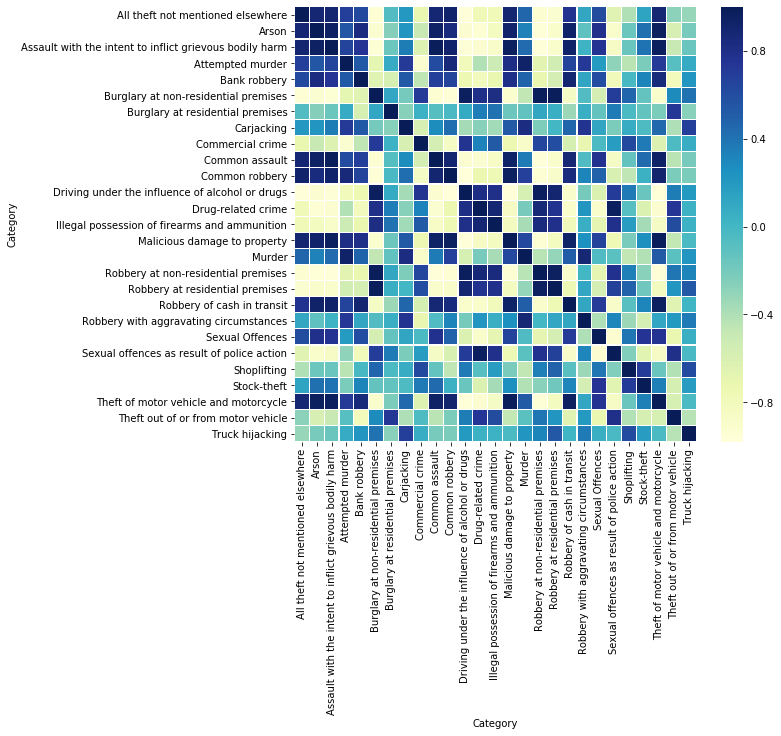

In [300]:

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 



The heatmap above shows the correlation between the types of crimes, pointing the crimes the positive correlating ones as the crimes that would go hand in hand. 
E.g Robbery at residential premises goes hand in hand with bulgary as non-residential premises.

# Question 5:

    • Plots/Visualizations: Boxplots and edf/Kernel density estimates of some crime type distributions across time.
    • Histogram of the distribution of some crime type across provinces.
    • Create overlayed time series plots showing trend of all crime types for Kwazulu/Natal.
    • Create overlayed time series plots showing trend of total crime types for all provinces.


Question 6:

    • Do any other exploration or analysis with the data apart from the questions mentioned above.



Kindly take note that extra explorations and analysis is added whiles answering the previous question